In [1]:
from sagemaker import get_execution_role
import sagemaker as sage
role = get_execution_role()
sess = sage.Session()

In [2]:
data_location="s3://peterz-sagemaker-east/data/img_align_celeba_attr.zip"
output_location="s3://peterz-sagemaker-east/output"

In [3]:
# note that you’d have to use ECR name prefixed with your AWS account number here
cls_image = "613076437200.dkr.ecr.us-east-1.amazonaws.com/platform/fadernetwork-cls:latest"

In [4]:
cls = sage.estimator.Estimator(
    cls_image,
    role,
    1,
    'ml.p2.xlarge',
    output_path=output_location,
    sagemaker_session=sess
)

In [ ]:
cls.fit(data_location)

INFO:sagemaker:Creating training-job with name: fadernetwork-cls-2018-02-24-07-24-49-258


....................................................................
Unzipping images file...
Loading images form /tmp/data/attributes.txt
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
Saving attributes to /tmp/data/attributes.pth ...
Saving images to /tmp/data/images_128_128.pth ...
INFO - 02/24/18 07:36:57 - 0:00:00 - ============ Initialized logger ============
INFO - 02/24/18 07:36:57 - 0:00:00 - attr: [('Smiling', 2)]
                                     batch_size: 32
                                     clip_grad_norm: 5
                                     debug: False
                                     dump_path: /opt/ml/model
                                     epoch_size: 50000
                                     h_flip: True
                                     hid_dim: 512
                                     img_fm: 3
                                     img_sz: 128
                

In [6]:
# again, use your ECR prefix
trn_image = "613076437200.dkr.ecr.us-east-1.amazonaws.com/platform/fadernetwork-trn:latest"
# job name from the previous step has to go into this path
cls_location = "s3://peterz-sagemaker-east/output/fadernetwork-cls-2018-02-24-07-24-49-258/output"

In [7]:
fader = sage.estimator.Estimator(
    trn_image,
    role,
    1,
    'ml.p2.xlarge',
    output_path=output_location,
    sagemaker_session=sess
)

In [8]:
fader.fit({'training':data_location, "classifier": cls_location})

INFO:sagemaker:Creating training-job with name: fadernetwork-trn-2018-02-24-09-44-15-969


............................................................................
periodic-20.pth
train.log
best.pth
periodic-10.pth
periodic-30.pth
params.pkl
Unzipping images file...
Loading images form /tmp/data/attributes.txt
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
Saving attributes to /tmp/data/attributes.pth ...
Saving images to /tmp/data/images_128_128.pth ...
INFO - 02/24/18 09:57:21 - 0:00:00 - ============ Initialized logger ============
INFO - 02/24/18 09:57:21 - 0:00:00 - ae_optimizer: adam,lr=0.0002
                                     ae_reload: 
                                     attr: [('Smiling', 2)]
                                     batch_size: 32
                                     clf_dis_reload: 
                                     clip_grad_norm: 5
                                     debug: False
                                     dec_dropout: 0.0
                    

INFO - 02/24/18 09:57:49 - 0:00:29 - 000768 - Latent discriminator : 0.68875 / Reconstruction loss : 0.30598
INFO - 02/24/18 09:57:56 - 0:00:35 - 001568 - Latent discriminator : 0.66451 / Reconstruction loss : 0.17456
INFO - 02/24/18 09:58:02 - 0:00:41 - 002368 - Latent discriminator : 0.61801 / Reconstruction loss : 0.12521
INFO - 02/24/18 09:58:08 - 0:00:47 - 003168 - Latent discriminator : 0.61706 / Reconstruction loss : 0.10152
INFO - 02/24/18 09:58:20 - 0:00:53 - 003968 - Latent discriminator : 0.61906 / Reconstruction loss : 0.08953
INFO - 02/24/18 09:58:26 - 0:01:05 - 004768 - Latent discriminator : 0.57763 / Reconstruction loss : 0.08303
INFO - 02/24/18 09:58:32 - 0:01:11 - 005568 - Latent discriminator : 0.54767 / Reconstruction loss : 0.07745
INFO - 02/24/18 09:58:38 - 0:01:17 - 006368 - Latent discriminator : 0.53086 / Reconstruction loss : 0.07000
INFO - 02/24/18 09:58:44 - 0:01:23 - 007168 - Latent discriminator : 0.52251 / Reconstruction loss : 0.07150
INFO - 02/24/18 09:

INFO - 02/24/18 10:06:16 - 0:08:55 - 001152 - Latent discriminator : 0.36775 / Reconstruction loss : 0.03488
INFO - 02/24/18 10:06:22 - 0:09:01 - 001952 - Latent discriminator : 0.35167 / Reconstruction loss : 0.03460
INFO - 02/24/18 10:06:28 - 0:09:08 - 002752 - Latent discriminator : 0.36009 / Reconstruction loss : 0.03431
INFO - 02/24/18 10:06:35 - 0:09:14 - 003552 - Latent discriminator : 0.33911 / Reconstruction loss : 0.03215
INFO - 02/24/18 10:06:41 - 0:09:20 - 004352 - Latent discriminator : 0.32174 / Reconstruction loss : 0.03342
INFO - 02/24/18 10:06:47 - 0:09:26 - 005152 - Latent discriminator : 0.34601 / Reconstruction loss : 0.03486
INFO - 02/24/18 10:06:53 - 0:09:33 - 005952 - Latent discriminator : 0.33483 / Reconstruction loss : 0.03284
INFO - 02/24/18 10:07:00 - 0:09:39 - 006752 - Latent discriminator : 0.32774 / Reconstruction loss : 0.03388
INFO - 02/24/18 10:07:06 - 0:09:45 - 007552 - Latent discriminator : 0.31914 / Reconstruction loss : 0.03276
INFO - 02/24/18 10:

INFO - 02/24/18 10:14:31 - 0:17:10 - 000736 - Latent discriminator : 0.30180 / Reconstruction loss : 0.02909
INFO - 02/24/18 10:14:37 - 0:17:16 - 001536 - Latent discriminator : 0.30683 / Reconstruction loss : 0.02842
INFO - 02/24/18 10:14:44 - 0:17:23 - 002336 - Latent discriminator : 0.31013 / Reconstruction loss : 0.02824
INFO - 02/24/18 10:14:50 - 0:17:29 - 003136 - Latent discriminator : 0.31628 / Reconstruction loss : 0.02833
INFO - 02/24/18 10:14:56 - 0:17:35 - 003936 - Latent discriminator : 0.28587 / Reconstruction loss : 0.02835
INFO - 02/24/18 10:15:02 - 0:17:42 - 004736 - Latent discriminator : 0.32866 / Reconstruction loss : 0.02829
INFO - 02/24/18 10:15:09 - 0:17:48 - 005536 - Latent discriminator : 0.31935 / Reconstruction loss : 0.02840
INFO - 02/24/18 10:15:15 - 0:17:54 - 006336 - Latent discriminator : 0.30827 / Reconstruction loss : 0.02770
INFO - 02/24/18 10:15:21 - 0:18:00 - 007136 - Latent discriminator : 0.31340 / Reconstruction loss : 0.02818
INFO - 02/24/18 10:

INFO - 02/24/18 10:22:53 - 0:25:32 - 001120 - Latent discriminator : 0.31355 / Reconstruction loss : 0.02669
INFO - 02/24/18 10:22:59 - 0:25:38 - 001920 - Latent discriminator : 0.27427 / Reconstruction loss : 0.02600
INFO - 02/24/18 10:23:05 - 0:25:44 - 002720 - Latent discriminator : 0.29098 / Reconstruction loss : 0.02616
INFO - 02/24/18 10:23:11 - 0:25:51 - 003520 - Latent discriminator : 0.31024 / Reconstruction loss : 0.02599
INFO - 02/24/18 10:23:18 - 0:25:57 - 004320 - Latent discriminator : 0.30442 / Reconstruction loss : 0.02592
INFO - 02/24/18 10:23:24 - 0:26:03 - 005120 - Latent discriminator : 0.32344 / Reconstruction loss : 0.02535
INFO - 02/24/18 10:23:30 - 0:26:09 - 005920 - Latent discriminator : 0.26899 / Reconstruction loss : 0.02665
INFO - 02/24/18 10:23:37 - 0:26:16 - 006720 - Latent discriminator : 0.29231 / Reconstruction loss : 0.02555
INFO - 02/24/18 10:23:43 - 0:26:22 - 007520 - Latent discriminator : 0.25700 / Reconstruction loss : 0.02504
INFO - 02/24/18 10:

INFO - 02/24/18 10:31:08 - 0:33:47 - 000704 - Latent discriminator : 0.28132 / Reconstruction loss : 0.02391
INFO - 02/24/18 10:31:14 - 0:33:53 - 001504 - Latent discriminator : 0.28176 / Reconstruction loss : 0.02386
INFO - 02/24/18 10:31:20 - 0:33:59 - 002304 - Latent discriminator : 0.26199 / Reconstruction loss : 0.02366
INFO - 02/24/18 10:31:27 - 0:34:06 - 003104 - Latent discriminator : 0.26362 / Reconstruction loss : 0.02430
INFO - 02/24/18 10:31:33 - 0:34:12 - 003904 - Latent discriminator : 0.29261 / Reconstruction loss : 0.02480
INFO - 02/24/18 10:31:39 - 0:34:18 - 004704 - Latent discriminator : 0.26243 / Reconstruction loss : 0.02376
INFO - 02/24/18 10:31:45 - 0:34:25 - 005504 - Latent discriminator : 0.28806 / Reconstruction loss : 0.02423
INFO - 02/24/18 10:31:52 - 0:34:31 - 006304 - Latent discriminator : 0.29728 / Reconstruction loss : 0.02406
INFO - 02/24/18 10:31:58 - 0:34:37 - 007104 - Latent discriminator : 0.31582 / Reconstruction loss : 0.02421
INFO - 02/24/18 10:

INFO - 02/24/18 10:39:29 - 0:42:09 - 001088 - Latent discriminator : 0.25537 / Reconstruction loss : 0.02189
INFO - 02/24/18 10:39:36 - 0:42:15 - 001888 - Latent discriminator : 0.27844 / Reconstruction loss : 0.02212
INFO - 02/24/18 10:39:42 - 0:42:21 - 002688 - Latent discriminator : 0.29021 / Reconstruction loss : 0.02107
INFO - 02/24/18 10:39:48 - 0:42:27 - 003488 - Latent discriminator : 0.24982 / Reconstruction loss : 0.02181
INFO - 02/24/18 10:39:54 - 0:42:34 - 004288 - Latent discriminator : 0.27921 / Reconstruction loss : 0.02225
INFO - 02/24/18 10:40:01 - 0:42:40 - 005088 - Latent discriminator : 0.26512 / Reconstruction loss : 0.02150
INFO - 02/24/18 10:40:07 - 0:42:46 - 005888 - Latent discriminator : 0.31117 / Reconstruction loss : 0.02125
INFO - 02/24/18 10:40:13 - 0:42:52 - 006688 - Latent discriminator : 0.28244 / Reconstruction loss : 0.02158
INFO - 02/24/18 10:40:20 - 0:42:59 - 007488 - Latent discriminator : 0.26774 / Reconstruction loss : 0.02195
INFO - 02/24/18 10:

INFO - 02/24/18 10:47:45 - 0:50:24 - 000672 - Latent discriminator : 0.31194 / Reconstruction loss : 0.02063
INFO - 02/24/18 10:47:51 - 0:50:30 - 001472 - Latent discriminator : 0.29210 / Reconstruction loss : 0.02147
INFO - 02/24/18 10:47:58 - 0:50:37 - 002272 - Latent discriminator : 0.27419 / Reconstruction loss : 0.02022
INFO - 02/24/18 10:48:04 - 0:50:43 - 003072 - Latent discriminator : 0.27904 / Reconstruction loss : 0.02104
INFO - 02/24/18 10:48:10 - 0:50:49 - 003872 - Latent discriminator : 0.28765 / Reconstruction loss : 0.02100
INFO - 02/24/18 10:48:16 - 0:50:56 - 004672 - Latent discriminator : 0.22185 / Reconstruction loss : 0.02065
INFO - 02/24/18 10:48:23 - 0:51:02 - 005472 - Latent discriminator : 0.24084 / Reconstruction loss : 0.02096
INFO - 02/24/18 10:48:29 - 0:51:08 - 006272 - Latent discriminator : 0.26399 / Reconstruction loss : 0.02087
INFO - 02/24/18 10:48:35 - 0:51:14 - 007072 - Latent discriminator : 0.27025 / Reconstruction loss : 0.02026
INFO - 02/24/18 10:

INFO - 02/24/18 10:56:07 - 0:58:46 - 001056 - Latent discriminator : 0.25911 / Reconstruction loss : 0.02041
INFO - 02/24/18 10:56:13 - 0:58:52 - 001856 - Latent discriminator : 0.24048 / Reconstruction loss : 0.01986
INFO - 02/24/18 10:56:19 - 0:58:58 - 002656 - Latent discriminator : 0.28847 / Reconstruction loss : 0.01971
INFO - 02/24/18 10:56:25 - 0:59:04 - 003456 - Latent discriminator : 0.29020 / Reconstruction loss : 0.01981
INFO - 02/24/18 10:56:32 - 0:59:11 - 004256 - Latent discriminator : 0.26774 / Reconstruction loss : 0.01976
INFO - 02/24/18 10:56:38 - 0:59:17 - 005056 - Latent discriminator : 0.25314 / Reconstruction loss : 0.02062
INFO - 02/24/18 10:56:44 - 0:59:23 - 005856 - Latent discriminator : 0.25811 / Reconstruction loss : 0.01988
INFO - 02/24/18 10:56:50 - 0:59:30 - 006656 - Latent discriminator : 0.27432 / Reconstruction loss : 0.01969
INFO - 02/24/18 10:56:57 - 0:59:36 - 007456 - Latent discriminator : 0.25004 / Reconstruction loss : 0.01992
INFO - 02/24/18 10:

INFO - 02/24/18 11:04:22 - 1:07:01 - 000640 - Latent discriminator : 0.26914 / Reconstruction loss : 0.01937
INFO - 02/24/18 11:04:28 - 1:07:07 - 001440 - Latent discriminator : 0.28061 / Reconstruction loss : 0.01923
INFO - 02/24/18 11:04:34 - 1:07:14 - 002240 - Latent discriminator : 0.30248 / Reconstruction loss : 0.01980
INFO - 02/24/18 11:04:41 - 1:07:20 - 003040 - Latent discriminator : 0.26651 / Reconstruction loss : 0.01932
INFO - 02/24/18 11:04:47 - 1:07:26 - 003840 - Latent discriminator : 0.27300 / Reconstruction loss : 0.01993
INFO - 02/24/18 11:04:53 - 1:07:32 - 004640 - Latent discriminator : 0.26755 / Reconstruction loss : 0.01868
INFO - 02/24/18 11:04:59 - 1:07:39 - 005440 - Latent discriminator : 0.27973 / Reconstruction loss : 0.01959
INFO - 02/24/18 11:05:06 - 1:07:45 - 006240 - Latent discriminator : 0.25251 / Reconstruction loss : 0.01940
INFO - 02/24/18 11:05:12 - 1:07:51 - 007040 - Latent discriminator : 0.26234 / Reconstruction loss : 0.01887
INFO - 02/24/18 11:

INFO - 02/24/18 11:12:43 - 1:15:22 - 001024 - Latent discriminator : 0.24873 / Reconstruction loss : 0.01811
INFO - 02/24/18 11:12:50 - 1:15:29 - 001824 - Latent discriminator : 0.25023 / Reconstruction loss : 0.01960
INFO - 02/24/18 11:12:56 - 1:15:35 - 002624 - Latent discriminator : 0.26753 / Reconstruction loss : 0.01843
INFO - 02/24/18 11:13:02 - 1:15:41 - 003424 - Latent discriminator : 0.21764 / Reconstruction loss : 0.01892
INFO - 02/24/18 11:13:08 - 1:15:48 - 004224 - Latent discriminator : 0.24066 / Reconstruction loss : 0.01922
INFO - 02/24/18 11:13:15 - 1:15:54 - 005024 - Latent discriminator : 0.24133 / Reconstruction loss : 0.01826
INFO - 02/24/18 11:13:21 - 1:16:00 - 005824 - Latent discriminator : 0.23523 / Reconstruction loss : 0.01907
INFO - 02/24/18 11:13:27 - 1:16:06 - 006624 - Latent discriminator : 0.25743 / Reconstruction loss : 0.01903
INFO - 02/24/18 11:13:34 - 1:16:13 - 007424 - Latent discriminator : 0.26729 / Reconstruction loss : 0.01930
INFO - 02/24/18 11:

INFO - 02/24/18 11:20:59 - 1:23:38 - 000608 - Latent discriminator : 0.25288 / Reconstruction loss : 0.01831
INFO - 02/24/18 11:21:05 - 1:23:44 - 001408 - Latent discriminator : 0.26366 / Reconstruction loss : 0.01835
INFO - 02/24/18 11:21:11 - 1:23:50 - 002208 - Latent discriminator : 0.26990 / Reconstruction loss : 0.01859
INFO - 02/24/18 11:21:17 - 1:23:57 - 003008 - Latent discriminator : 0.25206 / Reconstruction loss : 0.01824
INFO - 02/24/18 11:21:24 - 1:24:03 - 003808 - Latent discriminator : 0.27423 / Reconstruction loss : 0.01807
INFO - 02/24/18 11:21:30 - 1:24:09 - 004608 - Latent discriminator : 0.24882 / Reconstruction loss : 0.01873
INFO - 02/24/18 11:21:36 - 1:24:15 - 005408 - Latent discriminator : 0.23934 / Reconstruction loss : 0.01851
INFO - 02/24/18 11:21:42 - 1:24:22 - 006208 - Latent discriminator : 0.25867 / Reconstruction loss : 0.01886
INFO - 02/24/18 11:21:49 - 1:24:28 - 007008 - Latent discriminator : 0.24824 / Reconstruction loss : 0.01843
INFO - 02/24/18 11:

INFO - 02/24/18 11:29:20 - 1:31:59 - 000992 - Latent discriminator : 0.27715 / Reconstruction loss : 0.01724
INFO - 02/24/18 11:29:26 - 1:32:05 - 001792 - Latent discriminator : 0.26185 / Reconstruction loss : 0.01786
INFO - 02/24/18 11:29:33 - 1:32:12 - 002592 - Latent discriminator : 0.24842 / Reconstruction loss : 0.01797
INFO - 02/24/18 11:29:39 - 1:32:18 - 003392 - Latent discriminator : 0.31839 / Reconstruction loss : 0.01824
INFO - 02/24/18 11:29:45 - 1:32:24 - 004192 - Latent discriminator : 0.25241 / Reconstruction loss : 0.01770
INFO - 02/24/18 11:29:51 - 1:32:31 - 004992 - Latent discriminator : 0.23045 / Reconstruction loss : 0.01809
INFO - 02/24/18 11:29:58 - 1:32:37 - 005792 - Latent discriminator : 0.29344 / Reconstruction loss : 0.01794
INFO - 02/24/18 11:30:04 - 1:32:43 - 006592 - Latent discriminator : 0.25292 / Reconstruction loss : 0.01731
INFO - 02/24/18 11:30:10 - 1:32:49 - 007392 - Latent discriminator : 0.27229 / Reconstruction loss : 0.01770
INFO - 02/24/18 11:

INFO - 02/24/18 11:37:35 - 1:40:14 - 000576 - Latent discriminator : 0.25022 / Reconstruction loss : 0.01711
INFO - 02/24/18 11:37:42 - 1:40:21 - 001376 - Latent discriminator : 0.21400 / Reconstruction loss : 0.01811
INFO - 02/24/18 11:37:48 - 1:40:27 - 002176 - Latent discriminator : 0.26956 / Reconstruction loss : 0.01754
INFO - 02/24/18 11:37:54 - 1:40:33 - 002976 - Latent discriminator : 0.26332 / Reconstruction loss : 0.01754
INFO - 02/24/18 11:38:00 - 1:40:39 - 003776 - Latent discriminator : 0.23379 / Reconstruction loss : 0.01740
INFO - 02/24/18 11:38:07 - 1:40:46 - 004576 - Latent discriminator : 0.26293 / Reconstruction loss : 0.01704
INFO - 02/24/18 11:38:13 - 1:40:52 - 005376 - Latent discriminator : 0.24716 / Reconstruction loss : 0.01724
INFO - 02/24/18 11:38:19 - 1:40:58 - 006176 - Latent discriminator : 0.26725 / Reconstruction loss : 0.01699
INFO - 02/24/18 11:38:25 - 1:41:05 - 006976 - Latent discriminator : 0.27373 / Reconstruction loss : 0.01727
INFO - 02/24/18 11:

INFO - 02/24/18 11:45:57 - 1:48:36 - 000960 - Latent discriminator : 0.26391 / Reconstruction loss : 0.01698
INFO - 02/24/18 11:46:03 - 1:48:42 - 001760 - Latent discriminator : 0.27307 / Reconstruction loss : 0.01733
INFO - 02/24/18 11:46:09 - 1:48:48 - 002560 - Latent discriminator : 0.24776 / Reconstruction loss : 0.01714
INFO - 02/24/18 11:46:16 - 1:48:55 - 003360 - Latent discriminator : 0.25268 / Reconstruction loss : 0.01688
INFO - 02/24/18 11:46:22 - 1:49:01 - 004160 - Latent discriminator : 0.26575 / Reconstruction loss : 0.01687
INFO - 02/24/18 11:46:28 - 1:49:07 - 004960 - Latent discriminator : 0.22334 / Reconstruction loss : 0.01706
INFO - 02/24/18 11:46:34 - 1:49:14 - 005760 - Latent discriminator : 0.24022 / Reconstruction loss : 0.01644
INFO - 02/24/18 11:46:41 - 1:49:20 - 006560 - Latent discriminator : 0.19862 / Reconstruction loss : 0.01712
INFO - 02/24/18 11:46:47 - 1:49:26 - 007360 - Latent discriminator : 0.22082 / Reconstruction loss : 0.01717
INFO - 02/24/18 11:

INFO - 02/24/18 11:54:12 - 1:56:51 - 000544 - Latent discriminator : 0.23278 / Reconstruction loss : 0.01652
INFO - 02/24/18 11:54:18 - 1:56:57 - 001344 - Latent discriminator : 0.24141 / Reconstruction loss : 0.01650
INFO - 02/24/18 11:54:25 - 1:57:04 - 002144 - Latent discriminator : 0.23351 / Reconstruction loss : 0.01669
INFO - 02/24/18 11:54:31 - 1:57:10 - 002944 - Latent discriminator : 0.26395 / Reconstruction loss : 0.01624
INFO - 02/24/18 11:54:37 - 1:57:16 - 003744 - Latent discriminator : 0.25563 / Reconstruction loss : 0.01699
INFO - 02/24/18 11:54:43 - 1:57:23 - 004544 - Latent discriminator : 0.24647 / Reconstruction loss : 0.01677
INFO - 02/24/18 11:54:50 - 1:57:29 - 005344 - Latent discriminator : 0.23286 / Reconstruction loss : 0.01693
INFO - 02/24/18 11:54:56 - 1:57:35 - 006144 - Latent discriminator : 0.23475 / Reconstruction loss : 0.01629
INFO - 02/24/18 11:55:02 - 1:57:41 - 006944 - Latent discriminator : 0.23265 / Reconstruction loss : 0.01713
INFO - 02/24/18 11:

INFO - 02/24/18 12:02:34 - 2:05:13 - 000928 - Latent discriminator : 0.23717 / Reconstruction loss : 0.01635
INFO - 02/24/18 12:02:40 - 2:05:19 - 001728 - Latent discriminator : 0.22786 / Reconstruction loss : 0.01669
INFO - 02/24/18 12:02:46 - 2:05:25 - 002528 - Latent discriminator : 0.21244 / Reconstruction loss : 0.01662
INFO - 02/24/18 12:02:52 - 2:05:32 - 003328 - Latent discriminator : 0.25188 / Reconstruction loss : 0.01672
INFO - 02/24/18 12:02:59 - 2:05:38 - 004128 - Latent discriminator : 0.23388 / Reconstruction loss : 0.01694
INFO - 02/24/18 12:03:05 - 2:05:44 - 004928 - Latent discriminator : 0.25331 / Reconstruction loss : 0.01651
INFO - 02/24/18 12:03:11 - 2:05:50 - 005728 - Latent discriminator : 0.22801 / Reconstruction loss : 0.01635
INFO - 02/24/18 12:03:18 - 2:05:57 - 006528 - Latent discriminator : 0.18372 / Reconstruction loss : 0.01636
INFO - 02/24/18 12:03:24 - 2:06:03 - 007328 - Latent discriminator : 0.27655 / Reconstruction loss : 0.01653
INFO - 02/24/18 12:

INFO - 02/24/18 12:10:55 - 2:13:34 - 001312 - Latent discriminator : 0.24056 / Reconstruction loss : 0.01638
INFO - 02/24/18 12:11:01 - 2:13:41 - 002112 - Latent discriminator : 0.25303 / Reconstruction loss : 0.01545
INFO - 02/24/18 12:11:08 - 2:13:47 - 002912 - Latent discriminator : 0.26998 / Reconstruction loss : 0.01629
INFO - 02/24/18 12:11:14 - 2:13:53 - 003712 - Latent discriminator : 0.25411 / Reconstruction loss : 0.01600
INFO - 02/24/18 12:11:20 - 2:13:59 - 004512 - Latent discriminator : 0.21818 / Reconstruction loss : 0.01628
INFO - 02/24/18 12:11:27 - 2:14:06 - 005312 - Latent discriminator : 0.23637 / Reconstruction loss : 0.01616
INFO - 02/24/18 12:11:33 - 2:14:12 - 006112 - Latent discriminator : 0.27829 / Reconstruction loss : 0.01610
INFO - 02/24/18 12:11:39 - 2:14:18 - 006912 - Latent discriminator : 0.27143 / Reconstruction loss : 0.01569
INFO - 02/24/18 12:11:45 - 2:14:25 - 007712 - Latent discriminator : 0.21822 / Reconstruction loss : 0.01590
INFO - 02/24/18 12:

INFO - 02/24/18 12:19:10 - 2:21:50 - 000896 - Latent discriminator : 0.25190 / Reconstruction loss : 0.01562
INFO - 02/24/18 12:19:17 - 2:21:56 - 001696 - Latent discriminator : 0.21863 / Reconstruction loss : 0.01573
INFO - 02/24/18 12:19:23 - 2:22:02 - 002496 - Latent discriminator : 0.22970 / Reconstruction loss : 0.01595
INFO - 02/24/18 12:19:29 - 2:22:08 - 003296 - Latent discriminator : 0.23483 / Reconstruction loss : 0.01567
INFO - 02/24/18 12:19:35 - 2:22:15 - 004096 - Latent discriminator : 0.23839 / Reconstruction loss : 0.01548
INFO - 02/24/18 12:19:42 - 2:22:21 - 004896 - Latent discriminator : 0.24421 / Reconstruction loss : 0.01553
INFO - 02/24/18 12:19:48 - 2:22:27 - 005696 - Latent discriminator : 0.23399 / Reconstruction loss : 0.01575
INFO - 02/24/18 12:19:54 - 2:22:33 - 006496 - Latent discriminator : 0.21935 / Reconstruction loss : 0.01586
INFO - 02/24/18 12:20:01 - 2:22:40 - 007296 - Latent discriminator : 0.24938 / Reconstruction loss : 0.01515
INFO - 02/24/18 12:

INFO - 02/24/18 12:27:32 - 2:30:11 - 001280 - Latent discriminator : 0.24767 / Reconstruction loss : 0.01524
INFO - 02/24/18 12:27:38 - 2:30:17 - 002080 - Latent discriminator : 0.21850 / Reconstruction loss : 0.01586
INFO - 02/24/18 12:27:44 - 2:30:24 - 002880 - Latent discriminator : 0.22257 / Reconstruction loss : 0.01568
INFO - 02/24/18 12:27:51 - 2:30:30 - 003680 - Latent discriminator : 0.24888 / Reconstruction loss : 0.01549
INFO - 02/24/18 12:27:57 - 2:30:36 - 004480 - Latent discriminator : 0.28046 / Reconstruction loss : 0.01574
INFO - 02/24/18 12:28:03 - 2:30:42 - 005280 - Latent discriminator : 0.21969 / Reconstruction loss : 0.01560
INFO - 02/24/18 12:28:09 - 2:30:49 - 006080 - Latent discriminator : 0.26870 / Reconstruction loss : 0.01608
INFO - 02/24/18 12:28:16 - 2:30:55 - 006880 - Latent discriminator : 0.25625 / Reconstruction loss : 0.01546
INFO - 02/24/18 12:28:22 - 2:31:01 - 007680 - Latent discriminator : 0.19901 / Reconstruction loss : 0.01500
INFO - 02/24/18 12:

INFO - 02/24/18 12:35:47 - 2:38:26 - 000864 - Latent discriminator : 0.23558 / Reconstruction loss : 0.01502
INFO - 02/24/18 12:35:53 - 2:38:32 - 001664 - Latent discriminator : 0.22125 / Reconstruction loss : 0.01489
INFO - 02/24/18 12:35:59 - 2:38:38 - 002464 - Latent discriminator : 0.22750 / Reconstruction loss : 0.01526
INFO - 02/24/18 12:36:06 - 2:38:45 - 003264 - Latent discriminator : 0.25075 / Reconstruction loss : 0.01546
INFO - 02/24/18 12:36:12 - 2:38:51 - 004064 - Latent discriminator : 0.21065 / Reconstruction loss : 0.01538
INFO - 02/24/18 12:36:18 - 2:38:57 - 004864 - Latent discriminator : 0.23307 / Reconstruction loss : 0.01538
INFO - 02/24/18 12:36:24 - 2:39:04 - 005664 - Latent discriminator : 0.25534 / Reconstruction loss : 0.01561
INFO - 02/24/18 12:36:31 - 2:39:10 - 006464 - Latent discriminator : 0.25020 / Reconstruction loss : 0.01539
INFO - 02/24/18 12:36:37 - 2:39:16 - 007264 - Latent discriminator : 0.21555 / Reconstruction loss : 0.01532
INFO - 02/24/18 12:

INFO - 02/24/18 12:44:08 - 2:46:47 - 001248 - Latent discriminator : 0.21706 / Reconstruction loss : 0.01522
INFO - 02/24/18 12:44:15 - 2:46:54 - 002048 - Latent discriminator : 0.22899 / Reconstruction loss : 0.01592
INFO - 02/24/18 12:44:21 - 2:47:00 - 002848 - Latent discriminator : 0.27989 / Reconstruction loss : 0.01470
INFO - 02/24/18 12:44:27 - 2:47:06 - 003648 - Latent discriminator : 0.24255 / Reconstruction loss : 0.01548
INFO - 02/24/18 12:44:33 - 2:47:13 - 004448 - Latent discriminator : 0.23503 / Reconstruction loss : 0.01459
INFO - 02/24/18 12:44:40 - 2:47:19 - 005248 - Latent discriminator : 0.26134 / Reconstruction loss : 0.01506
INFO - 02/24/18 12:44:46 - 2:47:25 - 006048 - Latent discriminator : 0.21259 / Reconstruction loss : 0.01470
INFO - 02/24/18 12:44:52 - 2:47:31 - 006848 - Latent discriminator : 0.23063 / Reconstruction loss : 0.01488
INFO - 02/24/18 12:44:59 - 2:47:38 - 007648 - Latent discriminator : 0.23150 / Reconstruction loss : 0.01491
INFO - 02/24/18 12:

INFO - 02/24/18 12:52:24 - 2:55:03 - 000832 - Latent discriminator : 0.21964 / Reconstruction loss : 0.01449
INFO - 02/24/18 12:52:30 - 2:55:09 - 001632 - Latent discriminator : 0.20849 / Reconstruction loss : 0.01471
INFO - 02/24/18 12:52:36 - 2:55:15 - 002432 - Latent discriminator : 0.21505 / Reconstruction loss : 0.01551
INFO - 02/24/18 12:52:43 - 2:55:22 - 003232 - Latent discriminator : 0.22861 / Reconstruction loss : 0.01546
INFO - 02/24/18 12:52:49 - 2:55:28 - 004032 - Latent discriminator : 0.24850 / Reconstruction loss : 0.01486
INFO - 02/24/18 12:52:55 - 2:55:34 - 004832 - Latent discriminator : 0.22879 / Reconstruction loss : 0.01479
INFO - 02/24/18 12:53:02 - 2:55:41 - 005632 - Latent discriminator : 0.26827 / Reconstruction loss : 0.01431
INFO - 02/24/18 12:53:08 - 2:55:47 - 006432 - Latent discriminator : 0.21364 / Reconstruction loss : 0.01521
INFO - 02/24/18 12:53:14 - 2:55:53 - 007232 - Latent discriminator : 0.22038 / Reconstruction loss : 0.01491
INFO - 02/24/18 12:

INFO - 02/24/18 13:00:45 - 3:03:24 - 001216 - Latent discriminator : 0.22630 / Reconstruction loss : 0.01472
INFO - 02/24/18 13:00:51 - 3:03:30 - 002016 - Latent discriminator : 0.25519 / Reconstruction loss : 0.01459
INFO - 02/24/18 13:00:58 - 3:03:37 - 002816 - Latent discriminator : 0.23210 / Reconstruction loss : 0.01474
INFO - 02/24/18 13:01:04 - 3:03:43 - 003616 - Latent discriminator : 0.21768 / Reconstruction loss : 0.01505
INFO - 02/24/18 13:01:10 - 3:03:49 - 004416 - Latent discriminator : 0.23416 / Reconstruction loss : 0.01423
INFO - 02/24/18 13:01:16 - 3:03:56 - 005216 - Latent discriminator : 0.21765 / Reconstruction loss : 0.01472
INFO - 02/24/18 13:01:23 - 3:04:02 - 006016 - Latent discriminator : 0.23817 / Reconstruction loss : 0.01469
INFO - 02/24/18 13:01:29 - 3:04:08 - 006816 - Latent discriminator : 0.25286 / Reconstruction loss : 0.01457
INFO - 02/24/18 13:01:35 - 3:04:14 - 007616 - Latent discriminator : 0.21796 / Reconstruction loss : 0.01474
INFO - 02/24/18 13:

INFO - 02/24/18 13:09:00 - 3:11:39 - 000800 - Latent discriminator : 0.24809 / Reconstruction loss : 0.01424
INFO - 02/24/18 13:09:07 - 3:11:46 - 001600 - Latent discriminator : 0.24160 / Reconstruction loss : 0.01442
INFO - 02/24/18 13:09:13 - 3:11:52 - 002400 - Latent discriminator : 0.23674 / Reconstruction loss : 0.01443
INFO - 02/24/18 13:09:19 - 3:11:58 - 003200 - Latent discriminator : 0.26930 / Reconstruction loss : 0.01496
INFO - 02/24/18 13:09:25 - 3:12:05 - 004000 - Latent discriminator : 0.22828 / Reconstruction loss : 0.01441
INFO - 02/24/18 13:09:32 - 3:12:11 - 004800 - Latent discriminator : 0.22718 / Reconstruction loss : 0.01437
INFO - 02/24/18 13:09:38 - 3:12:17 - 005600 - Latent discriminator : 0.22994 / Reconstruction loss : 0.01475
INFO - 02/24/18 13:09:44 - 3:12:23 - 006400 - Latent discriminator : 0.23256 / Reconstruction loss : 0.01458
INFO - 02/24/18 13:09:51 - 3:12:30 - 007200 - Latent discriminator : 0.23914 / Reconstruction loss : 0.01473
INFO - 02/24/18 13:

INFO - 02/24/18 13:17:22 - 3:20:01 - 001184 - Latent discriminator : 0.23951 / Reconstruction loss : 0.01422
INFO - 02/24/18 13:17:28 - 3:20:07 - 001984 - Latent discriminator : 0.24338 / Reconstruction loss : 0.01390
INFO - 02/24/18 13:17:34 - 3:20:13 - 002784 - Latent discriminator : 0.25702 / Reconstruction loss : 0.01414
INFO - 02/24/18 13:17:41 - 3:20:20 - 003584 - Latent discriminator : 0.23873 / Reconstruction loss : 0.01482
INFO - 02/24/18 13:17:47 - 3:20:26 - 004384 - Latent discriminator : 0.22964 / Reconstruction loss : 0.01447
INFO - 02/24/18 13:17:53 - 3:20:32 - 005184 - Latent discriminator : 0.23316 / Reconstruction loss : 0.01449
INFO - 02/24/18 13:17:59 - 3:20:38 - 005984 - Latent discriminator : 0.22579 / Reconstruction loss : 0.01423
INFO - 02/24/18 13:18:06 - 3:20:45 - 006784 - Latent discriminator : 0.22831 / Reconstruction loss : 0.01395
INFO - 02/24/18 13:18:12 - 3:20:51 - 007584 - Latent discriminator : 0.22764 / Reconstruction loss : 0.01309
INFO - 02/24/18 13:

INFO - 02/24/18 13:25:37 - 3:28:16 - 000768 - Latent discriminator : 0.21941 / Reconstruction loss : 0.01355
INFO - 02/24/18 13:25:43 - 3:28:22 - 001568 - Latent discriminator : 0.22495 / Reconstruction loss : 0.01331
INFO - 02/24/18 13:25:49 - 3:28:29 - 002368 - Latent discriminator : 0.20719 / Reconstruction loss : 0.01350
INFO - 02/24/18 13:25:56 - 3:28:35 - 003168 - Latent discriminator : 0.23526 / Reconstruction loss : 0.01357
INFO - 02/24/18 13:26:02 - 3:28:41 - 003968 - Latent discriminator : 0.27233 / Reconstruction loss : 0.01432
INFO - 02/24/18 13:26:08 - 3:28:47 - 004768 - Latent discriminator : 0.25801 / Reconstruction loss : 0.01420
INFO - 02/24/18 13:26:14 - 3:28:54 - 005568 - Latent discriminator : 0.22564 / Reconstruction loss : 0.01425
INFO - 02/24/18 13:26:21 - 3:29:00 - 006368 - Latent discriminator : 0.24836 / Reconstruction loss : 0.01415
INFO - 02/24/18 13:26:27 - 3:29:06 - 007168 - Latent discriminator : 0.21241 / Reconstruction loss : 0.01385
INFO - 02/24/18 13:

KeyboardInterrupt: 

In [55]:
int_image = "613076437200.dkr.ecr.us-east-1.amazonaws.com/platform/fadernetwork-int:latest"
trn_location = "s3://peterz-sagemaker-east/output/fadernetwork-trn-2018-02-24-09-44-15-969/output"

In [56]:
interpolator = sage.estimator.Estimator(
    int_image,
    role,
    1,
    'ml.p2.xlarge',
    output_path=output_location,
    sagemaker_session=sess
)

In [57]:
interpolator.fit({'training':data_location, "fader": trn_location})

INFO:sagemaker:Creating training-job with name: fadernetwork-int-2018-02-25-12-15-32-595


.......................................................................
params.pkl
best_accu_ae.pth
periodic-15_ae.pth
periodic-10_ae.pth
periodic-15_lat_dis.pth
periodic-20_ae.pth
best_rec_ae.pth
periodic-5_lat_dis.pth
best_accu_lat_dis.pth
periodic-20_lat_dis.pth
best_rec_lat_dis.pth
periodic-10_lat_dis.pth
periodic-5_ae.pth
train.log
Unzipping images file...
Loading images form /tmp/data/attributes.txt
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
Saving attributes to /tmp/data/attributes.pth ...
Saving images to /tmp/data/images_128_128.pth ...
INFO - 02/25/18 12:28:28 - 0:00:00 - loading images from /tmp/data/images_128_128.pth
INFO - 02/25/18 12:28:34 - 0:00:05 - loading attributes from /tmp/data/images_128_128.pth
INFO - 02/25/18 12:28:34 - 0:00:05 - 162079 / 20260 / 20260 images with attributes for train / valid / test sets
INFO - 02/25/18 12:28:34 - 0:00:05 - Done
Generating interpolations
S

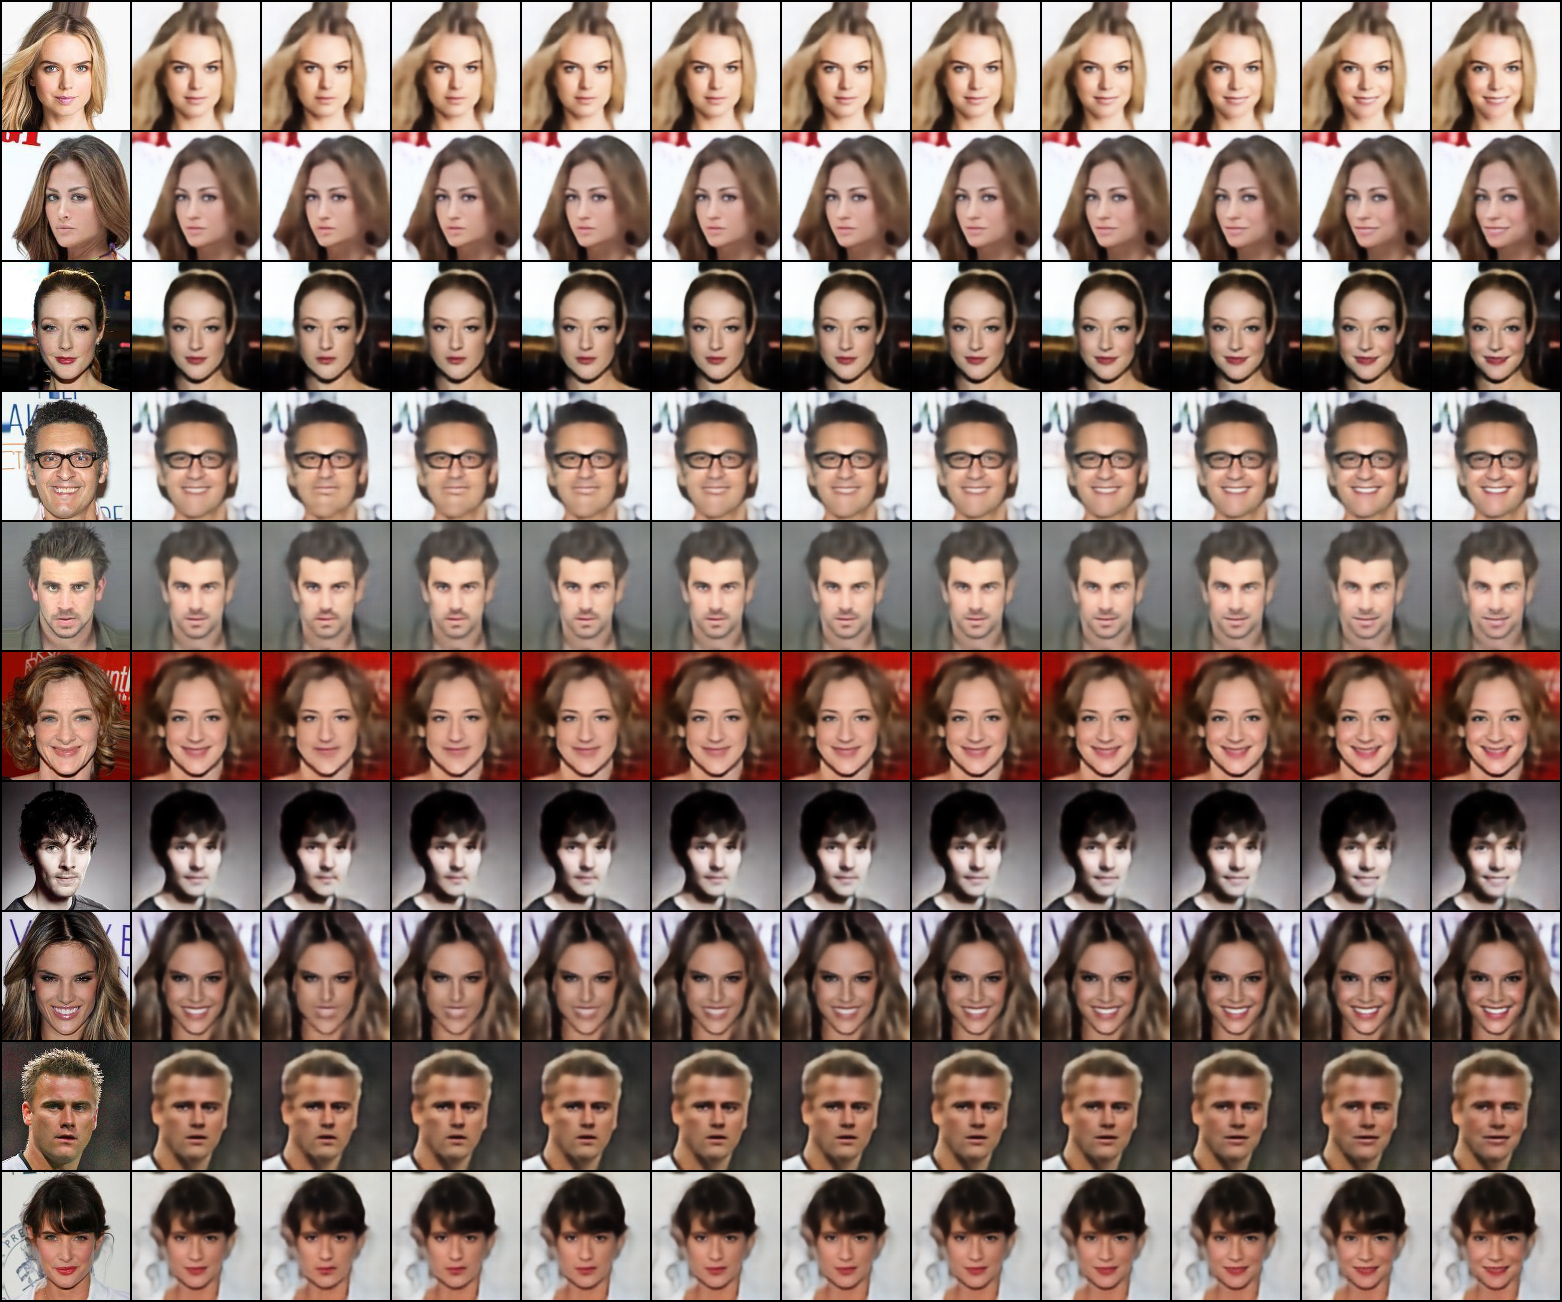

In [58]:
import boto3
import tarfile
from PIL import Image
import StringIO
fader_job = 'fadernetwork-int-2018-02-25-12-15-32-595'
s3file = boto3.resource('s3').Object('peterz-sagemaker-east', 'output/{}/output/model.tar.gz'.format(fader_job)).get()['Body']
with tarfile.open(fileobj=s3file, mode='r|*') as tarobj:
    for tarmember in tarobj:
        # go through all members in the tar and extract the first regular file
        if tarmember.isreg():
            imagedata = tarobj.extractfile(tarmember).read()
            image = Image.open(StringIO.StringIO(imagedata))
            break
        
image